Please download the file Data_EX1.txt

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2009.


### Import necessary library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np

## EX 1: HISTOGRAM

### Step 1: Read the text file

In [2]:
# Read text file
with open('Homework_sampledata1.txt','r') as f:
    lines = f.readlines() #Read all lines

# Print the result
for i in range(1, len(lines)):
    print (lines[i])

 1   10.5    7.3   10.8   18.2   20.0   25.3   27.2   25.1   25.8   23.0   24.9   12.6

 2    9.8   10.4   10.7   18.0   25.4   24.8   26.6   26.1   26.7   23.5   20.9   13.9

 3   10.7   11.0   11.7   18.8   25.4   26.5   27.4   25.8   25.1   24.5   20.4   17.7

 4   15.1   12.9   12.4   20.4   26.5   25.2   27.2   25.3   26.0   23.0   23.1   20.5

 5   13.5   11.4   16.0   22.4   24.0   26.0   26.2   26.2   23.5   22.7   22.5   16.7

 6   16.0   11.0   16.7   23.6   24.0   26.2   25.5   26.4   24.6   22.8   23.8   17.6

 7   15.8   10.3   17.1   23.6   25.1   27.8   25.0   25.0   24.7   24.4   19.6   16.4

 8   15.8   12.1   16.9   26.4   25.1   24.8   25.8   26.3   25.3   24.1   18.5   12.7

 9   18.0   11.7   17.8   23.8   22.5   26.2   25.6   24.3   22.7   24.0   17.2   12.6

10   20.2  -99.0   18.0   23.8   19.8   24.9   26.8   24.9   23.7   25.5   16.0   16.9

11   18.3   10.6   17.5   24.3   22.4   25.4   27.0   25.7   24.9   24.6   16.1   14.5

12   20.9   10.9   18.1   24.8  

### Step 2: Convert text file into array-like

In [3]:
line_array = []
for i in range(1, len(lines)):
    value = lines[i].split()
    row = []
    for v in value[1:]:
        v = float(v)
        if v != -99.0:
            row.append(v)
        else:
            row.append(None)
    line_array.append(row)

line_array

[[10.5, 7.3, 10.8, 18.2, 20.0, 25.3, 27.2, 25.1, 25.8, 23.0, 24.9, 12.6],
 [9.8, 10.4, 10.7, 18.0, 25.4, 24.8, 26.6, 26.1, 26.7, 23.5, 20.9, 13.9],
 [10.7, 11.0, 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5, 20.4, 17.7],
 [15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26.0, 23.0, 23.1, 20.5],
 [13.5, 11.4, 16.0, 22.4, 24.0, 26.0, 26.2, 26.2, 23.5, 22.7, 22.5, 16.7],
 [16.0, 11.0, 16.7, 23.6, 24.0, 26.2, 25.5, 26.4, 24.6, 22.8, 23.8, 17.6],
 [15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25.0, 25.0, 24.7, 24.4, 19.6, 16.4],
 [15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1, 18.5, 12.7],
 [18.0, 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24.0, 17.2, 12.6],
 [20.2, None, 18.0, 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5, 16.0, 16.9],
 [18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 27.0, 25.7, 24.9, 24.6, 16.1, 14.5],
 [20.9, 10.9, 18.1, 24.8, 23.2, 26.0, 24.6, 25.2, 25.0, 23.9, 16.9, 16.9],
 [17.4, 11.3, 19.0, 22.6, 21.4, 26.9, 27.5, 26.9, 24.5, 21.9, 17.9, 18.0],
 [14.5, 10.8, 18.5, 23.7, 2

### Step 3: Transpose the array and begin to convert into data frame

1. Transpose the existence array

In [4]:
line_array2 = np.transpose(line_array)
line_array2
data_raw = []
year = 2008
for month, row in enumerate (line_array2, start=1):
     for day, value in enumerate(row, start=1):
        print(f"{year}-{month:02d}-{day:02d} 00:00:00 {value}")
        data_raw.append([f"{year}-{month:02d}-{day:02d}", "00:00:00", value])

2008-01-01 00:00:00 10.5
2008-01-02 00:00:00 9.8
2008-01-03 00:00:00 10.7
2008-01-04 00:00:00 15.1
2008-01-05 00:00:00 13.5
2008-01-06 00:00:00 16.0
2008-01-07 00:00:00 15.8
2008-01-08 00:00:00 15.8
2008-01-09 00:00:00 18.0
2008-01-10 00:00:00 20.2
2008-01-11 00:00:00 18.3
2008-01-12 00:00:00 20.9
2008-01-13 00:00:00 17.4
2008-01-14 00:00:00 14.5
2008-01-15 00:00:00 11.5
2008-01-16 00:00:00 12.4
2008-01-17 00:00:00 13.3
2008-01-18 00:00:00 15.3
2008-01-19 00:00:00 17.8
2008-01-20 00:00:00 18.9
2008-01-21 00:00:00 16.1
2008-01-22 00:00:00 12.9
2008-01-23 00:00:00 13.8
2008-01-24 00:00:00 11.6
2008-01-25 00:00:00 12.9
2008-01-26 00:00:00 12.5
2008-01-27 00:00:00 13.5
2008-01-28 00:00:00 13.3
2008-01-29 00:00:00 12.0
2008-01-30 00:00:00 9.6
2008-01-31 00:00:00 8.6
2008-02-01 00:00:00 7.3
2008-02-02 00:00:00 10.4
2008-02-03 00:00:00 11.0
2008-02-04 00:00:00 12.9
2008-02-05 00:00:00 11.4
2008-02-06 00:00:00 11.0
2008-02-07 00:00:00 10.3
2008-02-08 00:00:00 12.1
2008-02-09 00:00:00 11.7
2008

2. Show the new array

In [5]:
line_array2

array([[10.5, 9.8, 10.7, 15.1, 13.5, 16.0, 15.8, 15.8, 18.0, 20.2, 18.3,
        20.9, 17.4, 14.5, 11.5, 12.4, 13.3, 15.3, 17.8, 18.9, 16.1, 12.9,
        13.8, 11.6, 12.9, 12.5, 13.5, 13.3, 12.0, 9.6, 8.6],
       [7.3, 10.4, 11.0, 12.9, 11.4, 11.0, 10.3, 12.1, 11.7, None, 10.6,
        10.9, 11.3, 10.8, 12.2, 13.1, 11.6, 12.4, 12.5, 12.1, 11.2, 13.6,
        15.3, 17.2, 16.9, 11.8, 13.0, 12.6, 10.4, None, None],
       [10.8, 10.7, 11.7, 12.4, 16.0, 16.7, 17.1, 16.9, 17.8, 18.0, 17.5,
        18.1, 19.0, 18.5, 19.6, 21.0, 22.0, 19.6, 20.7, 22.9, 22.1, 18.1,
        15.3, 17.0, 19.3, 18.0, 19.8, 20.9, 22.2, 21.5, 19.3],
       [18.2, 18.0, 18.8, 20.4, 22.4, 23.6, 23.6, 26.4, 23.8, 23.8, 24.3,
        24.8, 22.6, 23.7, 24.6, 22.3, 22.0, 23.0, 24.0, 24.6, 25.4, 24.0,
        18.4, 20.9, 20.4, 21.5, 21.9, 21.7, 23.5, 24.0, None],
       [20.0, 25.4, 25.4, 26.5, 24.0, 24.0, 25.1, 25.1, 22.5, 19.8, 22.4,
        23.2, 21.4, 22.6, 22.4, 25.0, 26.0, 20.8, 21.4, 23.0, 24.0, 24.5,
        25.9

3. Convert new array into data frame

In [6]:
df = pd.DataFrame(data_raw, columns=['Date', 'Time', 'Temperature'])
df

,Date,Time,Temperature
0,2008-01-01,00:00:00,10.5
1,2008-01-02,00:00:00,9.8
2,2008-01-03,00:00:00,10.7
3,2008-01-04,00:00:00,15.1
4,2008-01-05,00:00:00,13.5
...,...,...,...
367,2008-12-27,00:00:00,17.9
368,2008-12-28,00:00:00,19.4
369,2008-12-29,00:00:00,18.5
370,2008-12-30,00:00:00,14.7


4. Eliminate non-variable dates

In [7]:
for i in range(len(df)):
    if df['Date'][i] == '2008-02-30' or df['Date'][i] == '2008-02-31' or df['Date'][i] == '2008-04-31' or df['Date'][i] == '2008-06-31' or df['Date'][i] == '2008-09-31' or df['Date'][i] == '2008-11-31':
        df = df.drop(i)
df

,Date,Time,Temperature
0,2008-01-01,00:00:00,10.5
1,2008-01-02,00:00:00,9.8
2,2008-01-03,00:00:00,10.7
3,2008-01-04,00:00:00,15.1
4,2008-01-05,00:00:00,13.5
...,...,...,...
367,2008-12-27,00:00:00,17.9
368,2008-12-28,00:00:00,19.4
369,2008-12-29,00:00:00,18.5
370,2008-12-30,00:00:00,14.7


5. KDE and Histo within configuration [ kernel = gaussian, threshold = 1 ] 

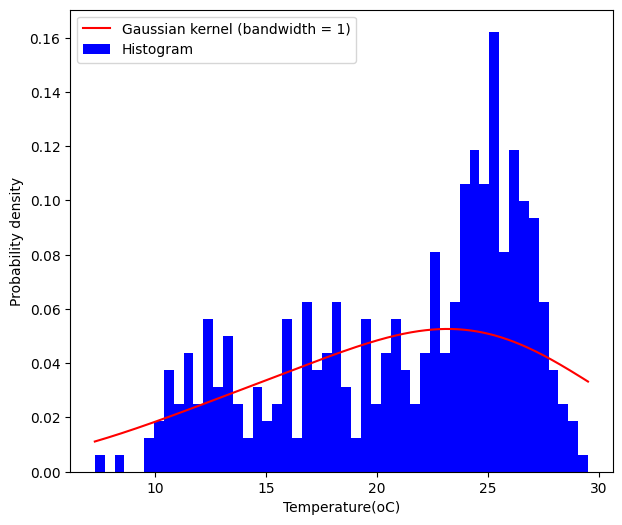

In [8]:
#--------------------------#
#1. Histogram
#--------------------------#
data = df['Temperature'].copy()
data = data.dropna()
kde = gaussian_kde(data, bw_method=1)

x = np.linspace(min(data), max(data), 1000)
kde_vals = kde(x)

plt.figure(figsize=(7,6))
plt.hist(data, bins=50, color="blue", density=True)
plt.plot(x, kde_vals, color='red')
plt.xlabel('Temperature(oC)')
plt.ylabel('Probability density')
plt.legend(['Gaussian kernel (bandwidth = 1)', 'Histogram'])
plt.show()

6. KDE and Histo within configuration [ kernel = gaussian, threshold = 0.25 ] for suitable with the desire plot 

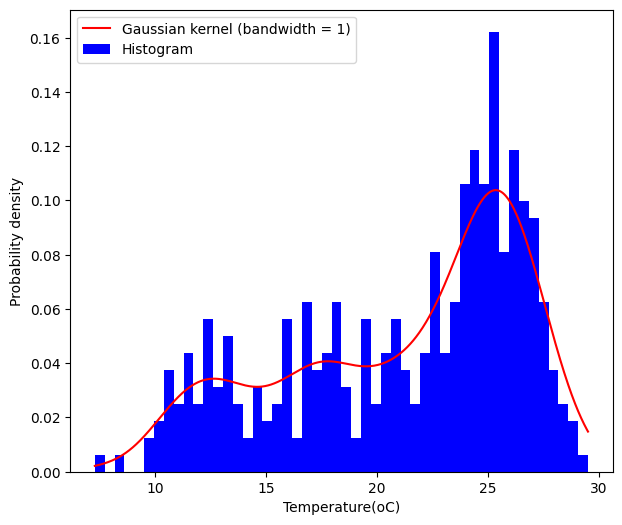

In [9]:
#--------------------------#
#1. Histogram
#--------------------------#
data = df['Temperature'].copy()
data = data.dropna()
kde = gaussian_kde(data, bw_method=0.25)

x = np.linspace(min(data), max(data), 1000)
kde_vals = kde(x)

plt.figure(figsize=(7,6))
plt.hist(data, bins=50, color="blue", density=True)
plt.plot(x, kde_vals, color='red')
plt.xlabel('Temperature(oC)')
plt.ylabel('Probability density')
plt.legend(['Gaussian kernel (bandwidth = 1)', 'Histogram'])
plt.show()

#--------------------------#
#2. Box plot
#--------------------------#

3. Draw 12 box plots coresponding to 12 months
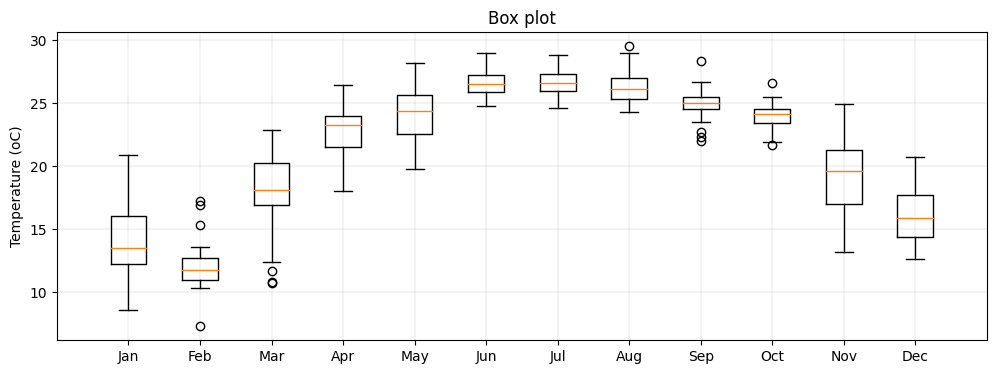

## EX 2: Box plot


1. Normal plot

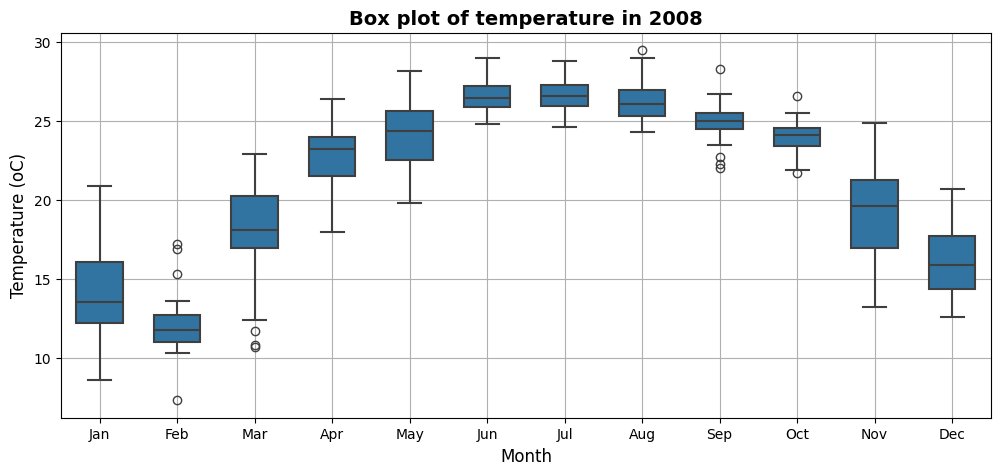

In [10]:
# Ensure the 'Date' column is in datetime format and extract 'Month'
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')

# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,5))

sns.boxplot(data=df, x='Month', y='Temperature', order=month_order, showfliers = True, width=0.6, linewidth=1.5)

plt.title('Box plot of temperature in 2008', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (oC)', fontsize=12)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)

plt.show()

2. Fancy plot

C:\Users\dangq\AppData\Local\Temp\ipykernel_5244\3704926281.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Temperature', order=month_order,


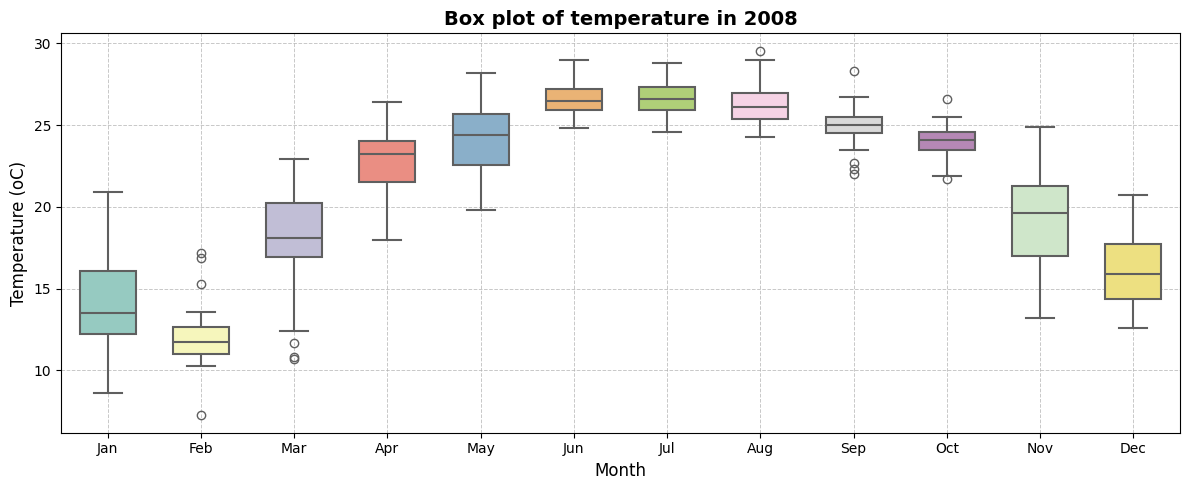

In [11]:
# Ensure the 'Date' column is in datetime format and extract 'Month'
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')

# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Customize plot appearance
plt.figure(figsize=(12, 5))

# Use seaborn for more flexible and enhanced styling
sns.boxplot(data=df, x='Month', y='Temperature', order=month_order, 
            palette="Set3", showfliers=True, width=0.6, linewidth=1.5)

# Add titles and labels
plt.title('Box plot of temperature in 2008', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (oC)', fontsize=12)

# Adjust tick parameters
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Show grid with more customization
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Display plot
plt.tight_layout()  # Ensures the plot fits within the figure area
plt.show()


## EX 3: Violin plot

#--------------------------#
#3. Violin plot
#--------------------------#
4. Do similarly for violin plot
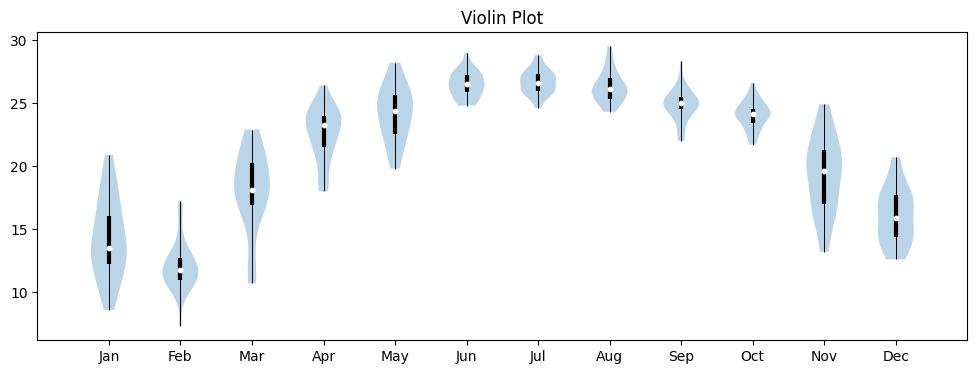

C:\Users\dangq\AppData\Local\Temp\ipykernel_5244\2511870867.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Month', y='Temperature', order=month_order,


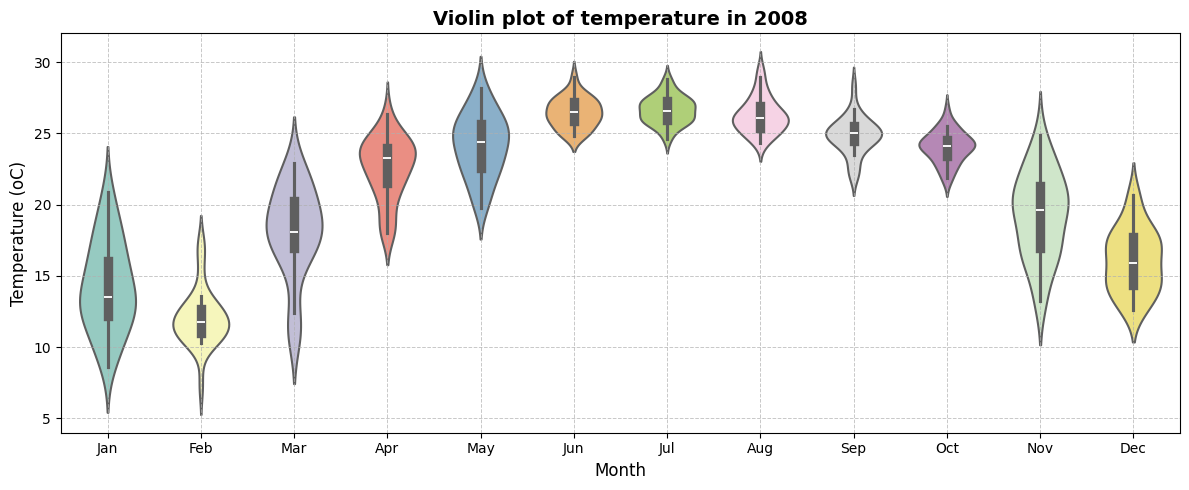

In [12]:
#--------------------------#
#3. Violin plot
#--------------------------#
# Ensure the 'Date' column is in datetime format and extract 'Month'
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')

# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Customize plot appearance
plt.figure(figsize=(12, 5))

sns.violinplot(data=df, x='Month', y='Temperature', order=month_order, 
            palette="Set3", width=0.6, linewidth=1.5)

# Add titles and labels
plt.title('Violin plot of temperature in 2008', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (oC)', fontsize=12)

# Adjust tick parameters
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Show grid with more customization
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Display plot
plt.tight_layout()  # Ensures the plot fits within the figure area
plt.show()



## EX 4: Error bar plot

#--------------------------#
#4. Error bar
#--------------------------#

5. Plot the monthly mean temperature and the error bar. The error bar is defined as +-1 standard deviation from the mean value.
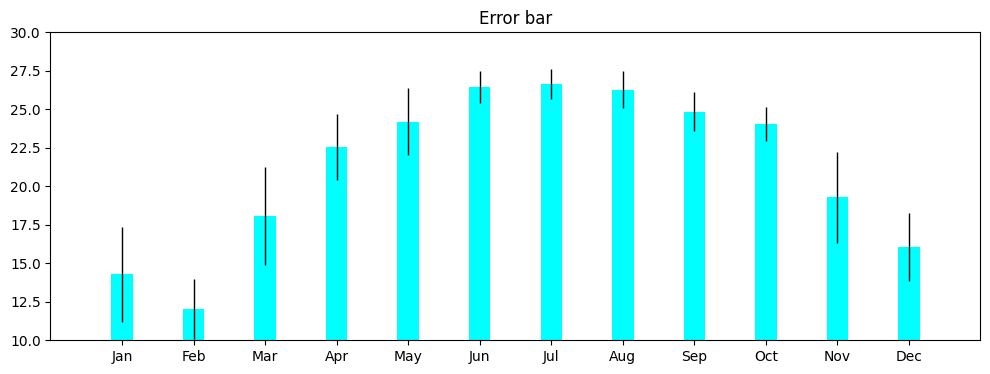

C:\Users\dangq\AppData\Local\Temp\ipykernel_5244\4021351850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_error = df.groupby('Month')['Temperature'].agg(['mean', 'std']).reset_index()


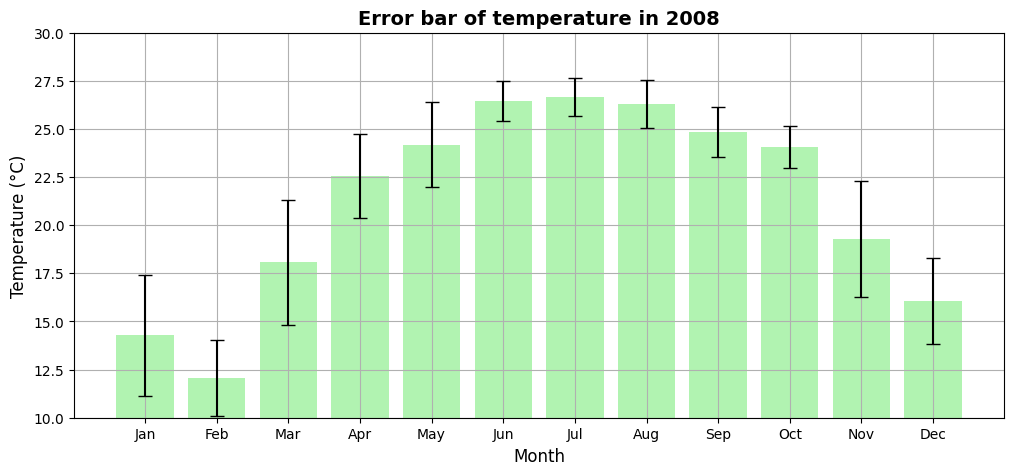

In [13]:
df_error = df.groupby('Month')['Temperature'].agg(['mean', 'std']).reset_index()


df_error.columns = ['Month', 'Temperature', 'Error']

# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_error['Month'] = pd.Categorical(df_error['Month'], categories=month_order, ordered=True)


plt.figure(figsize=(12, 5))


plt.bar(df_error['Month'], df_error['Temperature'], yerr=df_error['Error'], 
        capsize=5, color='lightgreen', alpha=0.7)


plt.title('Error bar of temperature in 2008', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Adjust y-axis limits if needed
plt.ylim(10, 30)  

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)

 
plt.show()


---
#--------------------------#
#5. Bar plot - a ranking problem
#--------------------------#
Let's imagine that we have 45 students.
In the final exam, we have math and literature score.

The math score is equal to mid_term * 40% + final * 60%.
Same for the literature score.

The final score is the average of the literature score and math score.

Now, we want to plot the score of each student. However, we want to see the score descending (meaning that the student with highest score will stay on top).

Also, we would like to know more about the top 10 students. Therefore, for the first 3 highest overal rank students, highlight the math and literature score with 1,2, and 3. From 4-10, highlight the component score with a star (*). The student ID is displayed in the left hand of the score bar. The use of panda library is prohibited.

Input file:

(each file has 2 columns, the first column is the midterm score, the second column is the final score)

Literature score:

https://drive.google.com/file/d/1ZTUb80rozqXNj3eC8XSzv0Fc3ytsL8pT/view?usp=sharing

Math score:

https://drive.google.com/file/d/1cn_2wTLzGO45adLCSzqbCbQ6I-U8xtgC/view?usp=sharing

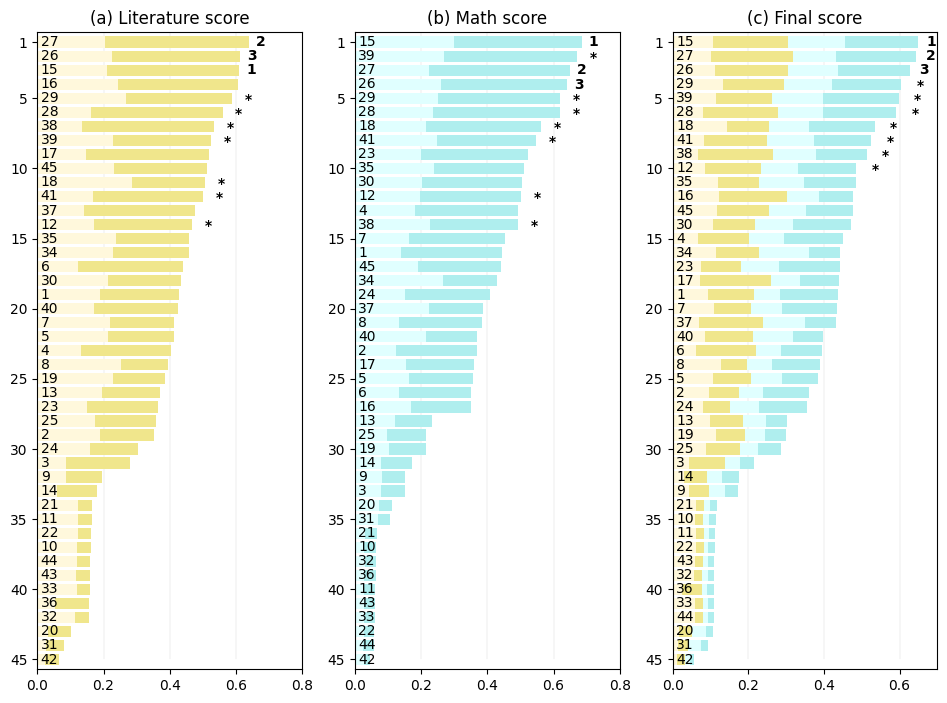

In [14]:
# Read literature
with open('HW2_literature_score.txt', 'r') as f:
    liter_lines = f.readlines()

lit_score = []

for i in range(1, len(liter_lines)):
    line = liter_lines[i].split()
    
    liter_float = []
    for x in line:
        x = float(x)
        liter_float.append(x)
    lit_score.append(liter_float)

lit_score


[[0.4757431278816473, 0.2693791788909508],
 [0.21729721962733187, 0.320505198441375],
 [0.3311396953236662, 0.45391425735759083],
 [0.5350711683314091, 0.3314603528679057],
 [0.3086693126267346, 0.5262435758632853],
 [0.5509934556534188, 0.3233822445258821],
 [0.6354871958166165, 0.2334702673959359],
 [0.21980198193401565, 0.1781240228472164],
 [0.298940087894391, 0.07109031946389556],
 [0.3035425198829478, 0.0708728086330481],
 [0.42993588361068474, 0.491805629218943],
 [0.4893137624898449, 0.2920642811491708],
 [0.14844636195806618, 0.2038941519297053],
 [0.528625886475898, 0.6642593441964383],
 [0.6106218528378492, 0.604583016272331],
 [0.36732583731002116, 0.6195641990373547],
 [0.7147006285104621, 0.36913831875256076],
 [0.5691102178331778, 0.26190066215790275],
 [0.08101869026036441, 0.11356011383719353],
 [0.30506860330377567, 0.07385272335904913],
 [0.30383964410332637, 0.06991383407165805],
 [0.376764719665275, 0.354727149498139],
 [0.3991492218547377, 0.2392295878939669],
 [0

In [15]:
# Read math line
with open('HW2_math_score.txt', 'r') as f:
    math_lines = f.readlines()

math_score = []

for i in range(1, len(math_lines)):
    line = math_lines[i].split()
    
    math_float = []
    for x in line:
        x = float(x)
        math_float.append(x)
    math_score.append(math_float)

math_score

[[0.3098986100197985, 0.40806921009917724],
 [0.19329271900108538, 0.12380647356277293],
 [0.4568914552217353, 0.5186767377403503],
 [0.40957360652996827, 0.32203075483911836],
 [0.3339236608427993, 0.36195354902360677],
 [0.4117978482363996, 0.48017312658082073],
 [0.3301137117218395, 0.42015643485324966],
 [0.2065835309161069, 0.11609174380771946],
 [0.07038244425957431, 0.06126231299414976],
 [0.0658561957180748, 0.059043355570912136],
 [0.48934563737694203, 0.5110328919294904],
 [0.3052029280136305, 0.18299776160721762],
 [0.19557440060271672, 0.1544257227974862],
 [0.7503060642295467, 0.6417223449885958],
 [0.41985961248647774, 0.3025321262887719],
 [0.38255479290173167, 0.3452119380785679],
 [0.5340640343373627, 0.5786681984181097],
 [0.2597928896909842, 0.18524246452363854],
 [0.18339314536921736, 0.06315483388846337],
 [0.07514094571617552, 0.059850163733162126],
 [0.06437029382538213, 0.054480024398181094],
 [0.49739898921998577, 0.5380614197760486],
 [0.37728897186291316, 0.4

In [16]:
# Math rank
weighted_scores_math = []
for score_pair in math_score:
    weighted_score = score_pair[0] * 0.4 + score_pair[1] * 0.6
    weighted_scores_math.append(weighted_score)
weighted_scores_math.sort(reverse=True)
weighted_scores_math

[0.6851558326849762,
 0.670186833265411,
 0.6496774561123841,
 0.6420379920889543,
 0.6210035441433689,
 0.6202603179522762,
 0.5608265327858108,
 0.548211848727266,
 0.5217964475536234,
 0.5101739012418064,
 0.5053331377700216,
 0.502357990108471,
 0.4939626247329043,
 0.49345580702477265,
 0.45282301524305224,
 0.4426755888751083,
 0.4301028824801578,
 0.4079937042533731,
 0.3873722647902105,
 0.38413934560068563,
 0.36967164576805067,
 0.36880097006742574,
 0.3601490800078334,
 0.35704789551545835,
 0.3507415937512838,
 0.34946312076785424,
 0.23187982816978278,
 0.21542903170769248,
 0.21506263459057678,
 0.1708851939195784,
 0.15228845865107443,
 0.1516009717380979,
 0.11125015848076496,
 0.10669150929938684,
 0.06596647652636749,
 0.06491036550031959,
 0.06455523414051763,
 0.06300306057643526,
 0.061768491629777204,
 0.06151947681354306,
 0.06066480504622253,
 0.05843613216906151,
 0.058135904420555176,
 0.04490063325579065]

In [17]:
# Literature rank
weighted_scores_literature = []
for score_pair in lit_score:
    weighted_score = score_pair[0] * 0.4 + score_pair[1] * 0.6
    weighted_scores_literature.append(weighted_score)
weighted_scores_literature.sort(reverse=True)
weighted_scores_literature

[0.6389171151560931,
 0.6123602714729006,
 0.6100059611082222,
 0.6069985508985383,
 0.5890842175216806,
 0.5596420598876073,
 0.5328434707790036,
 0.5252021797380184,
 0.5186688543464213,
 0.5121189583471286,
 0.5073632426557213,
 0.5013914121943527,
 0.4773630466927067,
 0.4670577309756397,
 0.457958631090826,
 0.4576545908455509,
 0.439213870568665,
 0.43537940221355664,
 0.4241466952020367,
 0.4144267289768968,
 0.4129046790533071,
 0.404804432544021,
 0.39427703876420817,
 0.3847844844280128,
 0.3709640736854405,
 0.3635421775649934,
 0.358157997698085,
 0.3519247584872294,
 0.3031974414782752,
 0.2792220069157577,
 0.1947952064819361,
 0.18171503594104965,
 0.16633907533693976,
 0.16394069313300796,
 0.16348415808432537,
 0.16223022683609375,
 0.15965209176482445,
 0.15942314467752325,
 0.15828471438276542,
 0.15619777958036132,
 0.1561888190129158,
 0.10054354440646188,
 0.08081527807273785,
 0.06647193507244914]

In [18]:
# Concat 2 array weighted_scores_literature and weighted_scores_math
final = []
for i in range(len(weighted_scores_literature)):
    final.append([weighted_scores_math[i],weighted_scores_literature[i]])
final

[[0.6851558326849762, 0.6389171151560931],
 [0.670186833265411, 0.6123602714729006],
 [0.6496774561123841, 0.6100059611082222],
 [0.6420379920889543, 0.6069985508985383],
 [0.6210035441433689, 0.5890842175216806],
 [0.6202603179522762, 0.5596420598876073],
 [0.5608265327858108, 0.5328434707790036],
 [0.548211848727266, 0.5252021797380184],
 [0.5217964475536234, 0.5186688543464213],
 [0.5101739012418064, 0.5121189583471286],
 [0.5053331377700216, 0.5073632426557213],
 [0.502357990108471, 0.5013914121943527],
 [0.4939626247329043, 0.4773630466927067],
 [0.49345580702477265, 0.4670577309756397],
 [0.45282301524305224, 0.457958631090826],
 [0.4426755888751083, 0.4576545908455509],
 [0.4301028824801578, 0.439213870568665],
 [0.4079937042533731, 0.43537940221355664],
 [0.3873722647902105, 0.4241466952020367],
 [0.38413934560068563, 0.4144267289768968],
 [0.36967164576805067, 0.4129046790533071],
 [0.36880097006742574, 0.404804432544021],
 [0.3601490800078334, 0.39427703876420817],
 [0.357047

In [19]:
final_scores = []
for score_final_pair in final:
    final_score = (score_final_pair[0]/2) + (score_final_pair[1]/2)
    final_scores.append(final_score)
final_scores.sort(reverse=True)
final_scores

[0.6620364739205347,
 0.6412735523691557,
 0.6298417086103032,
 0.6245182714937463,
 0.6050438808325247,
 0.5899511889199418,
 0.5468350017824073,
 0.5367070142326422,
 0.5202326509500224,
 0.5111464297944674,
 0.5063481902128715,
 0.5018747011514119,
 0.4856628357128055,
 0.4802567690002062,
 0.45539082316693913,
 0.45016508986032955,
 0.4346583765244114,
 0.4216865532334649,
 0.4057594799961236,
 0.3992830372887912,
 0.3912881624106789,
 0.38680270130572336,
 0.3772130593860208,
 0.3709161899717356,
 0.36085283371836213,
 0.3565026491664238,
 0.2950189129339339,
 0.28367689509746097,
 0.259130038034426,
 0.22505360041766806,
 0.17354183256650527,
 0.16665800383957377,
 0.13879461690885236,
 0.13531610121619742,
 0.11472531730534644,
 0.11357029616820667,
 0.11210366295267105,
 0.11121310262697925,
 0.11002660300627132,
 0.10885862819695219,
 0.10842681202956916,
 0.0794898382877617,
 0.06947559124664651,
 0.055686284164119894]

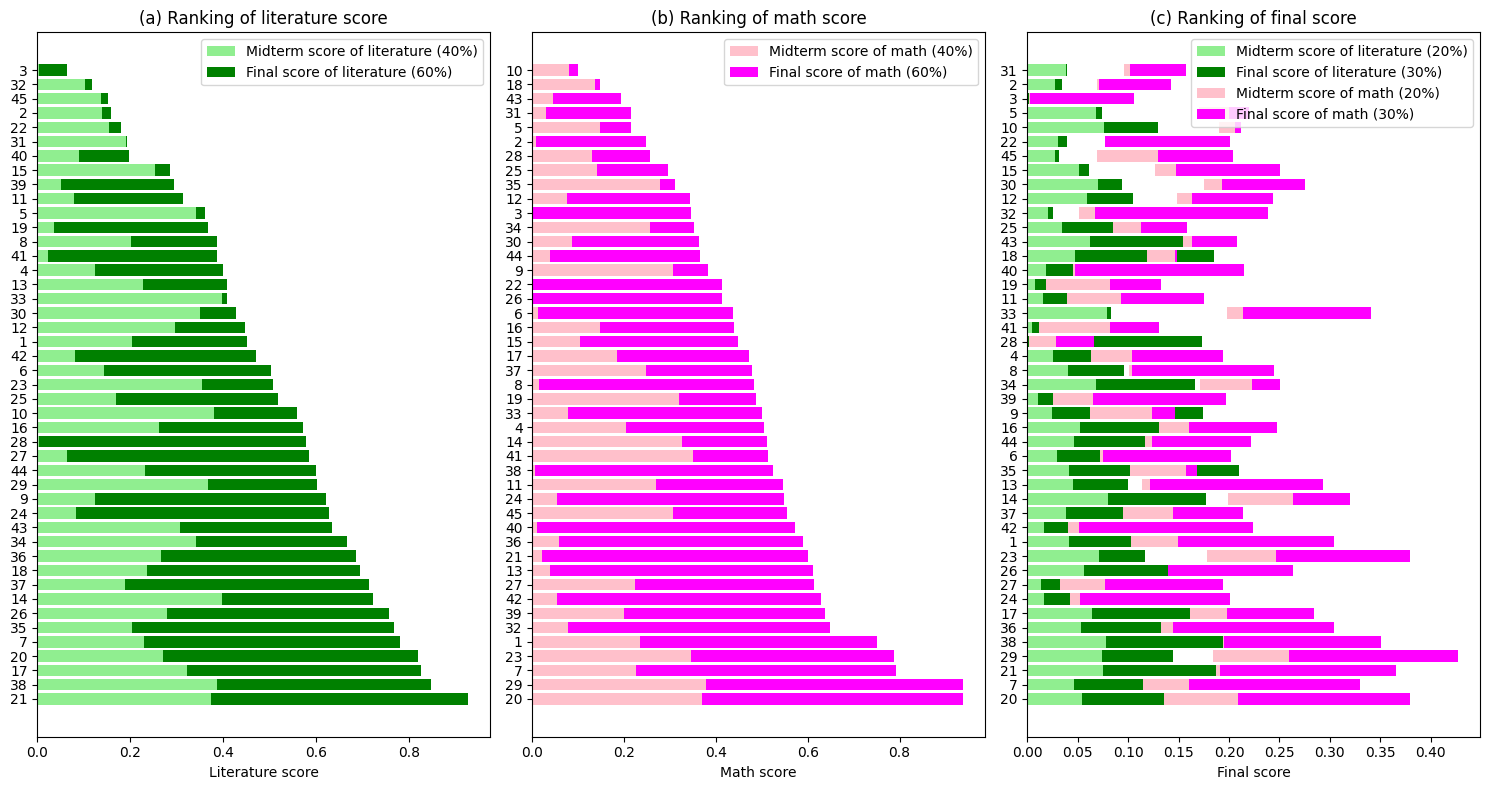

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
students = np.arange(1, 46)  # Assuming 45 students, change accordingly

# Example midterm and final scores for literature and math
liter_midterm = np.random.rand(45) * 0.4  # 40% weight
liter_final = np.random.rand(45) * 0.6    # 60% weight

math_midterm = np.random.rand(45) * 0.4   # 40% weight
math_final = np.random.rand(45) * 0.6     # 60% weight

# Final scores with new weights (e.g., literature: midterm 20%, final 30%, math: midterm 20%, final 30%)
final_score = liter_midterm * 0.2 + liter_final * 0.3 + math_midterm * 0.2 + math_final * 0.3

# Sort students by scores for ranking
liter_sort_idx = np.argsort(-(liter_midterm + liter_final))
math_sort_idx = np.argsort(-(math_midterm + math_final))
final_sort_idx = np.argsort(-final_score)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# (a) Ranking of literature score
axs[0].barh(students, liter_midterm[liter_sort_idx], color='lightgreen', label='Midterm score of literature (40%)')
axs[0].barh(students, liter_final[liter_sort_idx], left=liter_midterm[liter_sort_idx], color='green', label='Final score of literature (60%)')
axs[0].set_yticks(students)
axs[0].set_yticklabels(students[liter_sort_idx])
axs[0].set_xlabel('Literature score')
axs[0].set_title('(a) Ranking of literature score')
axs[0].legend()

# (b) Ranking of math score
axs[1].barh(students, math_midterm[math_sort_idx], color='pink', label='Midterm score of math (40%)')
axs[1].barh(students, math_final[math_sort_idx], left=math_midterm[math_sort_idx], color='magenta', label='Final score of math (60%)')
axs[1].set_yticks(students)
axs[1].set_yticklabels(students[math_sort_idx])
axs[1].set_xlabel('Math score')
axs[1].set_title('(b) Ranking of math score')
axs[1].legend()

# (c) Ranking of final score
axs[2].barh(students, liter_midterm[final_sort_idx] * 0.2, color='lightgreen', label='Midterm score of literature (20%)')
axs[2].barh(students, liter_final[final_sort_idx] * 0.3, left=liter_midterm[final_sort_idx] * 0.2, color='green', label='Final score of literature (30%)')
axs[2].barh(students, math_midterm[final_sort_idx] * 0.2, left=liter_midterm[final_sort_idx] * 0.5, color='pink', label='Midterm score of math (20%)')
axs[2].barh(students, math_final[final_sort_idx] * 0.3, left=liter_midterm[final_sort_idx] * 0.5 + math_midterm[final_sort_idx] * 0.2, color='magenta', label='Final score of math (30%)')
axs[2].set_yticks(students)
axs[2].set_yticklabels(students[final_sort_idx])
axs[2].set_xlabel('Final score')
axs[2].set_title('(c) Ranking of final score')
axs[2].legend()

plt.tight_layout()
plt.show()


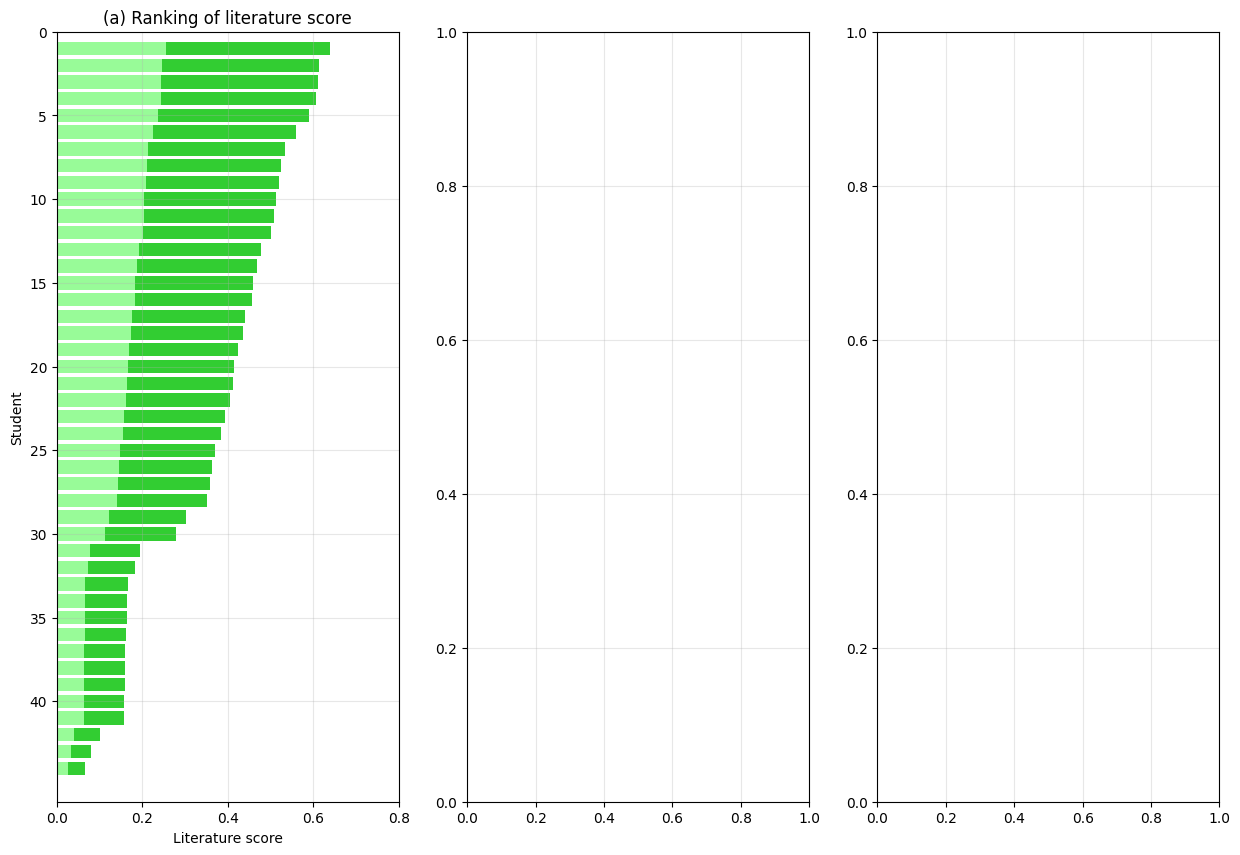

In [21]:
#--------------------------#
#5. Bar plot - a ranking problem
#--------------------------#

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
# grid
for i in range(3):
    axs[i].grid(True, alpha=0.3)

axs[0].set_title('(a) Ranking of literature score')
axs[0].invert_yaxis() 
axs[0].set_xlabel('Literature score')
axs[0].set_ylabel('Student')
axs[0].set_xticks(np.arange(0, 0.81, 0.2))
axs[0].set_yticks(np.arange(0, 45, 5))
axs[0].set_xlim(0, 0.8)
axs[0].set_ylim(46, 0)


lit_score_fourty = []
lit_score_sixty = []
for score_pair in weighted_scores_literature:
    fourty_score = score_pair * 0.4 
    sixty_score = score_pair * 0.6
    lit_score_fourty.append(fourty_score)
    lit_score_sixty.append(sixty_score)
lit_score_fourty.sort(reverse=True)
lit_score_sixty.sort(reverse=True)

# Plotting midterm and final score bars
for i in range(len(weighted_scores_literature)):
    axs[0].barh(i+1, lit_score_fourty[i], color='palegreen')
    axs[0].barh(i+1, lit_score_sixty[i], left=lit_score_fourty[i], color='limegreen')



#--------------------------#
#6. Do the homework 1 again, without using panda
#--------------------------#

Please download the file  Homework_sampledata1.txt from here:

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation.
Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

Your task is:
1. Plot the daily temperature from 01 Jan 2008 to 31 Dec 2008.

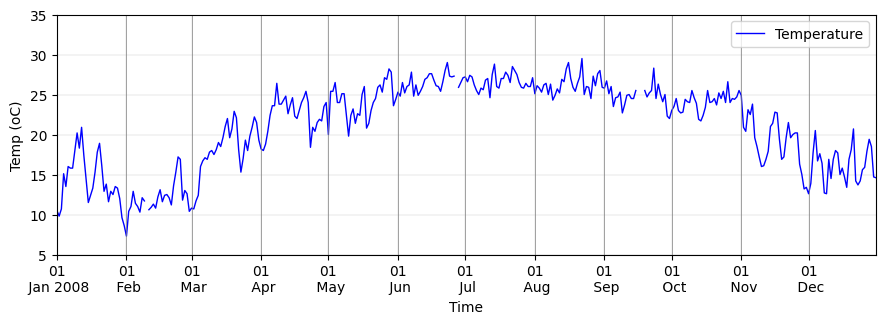

2. Calculate the monthly mean in 2008. Please note that the days in different months are different

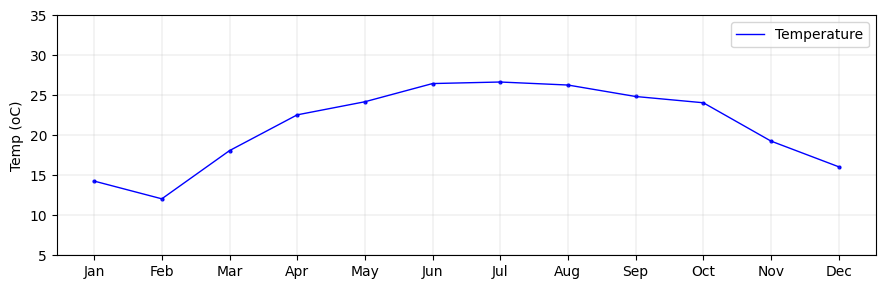

In [22]:
#--------------------------#
#6. Homework 1 without panda
#--------------------------#
